In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as  sm


In [208]:
data=pd.read_csv("C:/Users/Dell/Downloads/imports-85.data",header=None,na_values='?')
data.columns=["symboling","normalized_losses","make","fuel_type","aspiration","num_of_doors","body_style","drive_wheels","engine_location","wheel_base","length","width","height","curb_weight","engine_type","num_of_cylinders","engine_size","fuel_system","bore","stroke","compression_ratio","horsepower","peak_rpm","city_mpg","highway_mpg","price"]
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [18]:
data.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel-type             0
aspiration            0
num_of_doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak_rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [19]:
data.describe()

,symboling,normalized_losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak_rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x2205c5e16d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2205c5e1130>,
 'boxes': [<matplotlib.lines.Line2D at 0x2205c5e3ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x2205c5db2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2205c5db340>],
 'means': []}

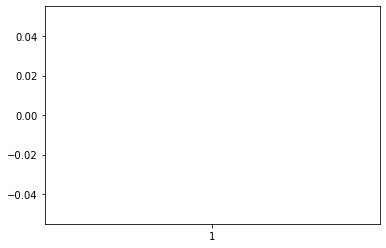

In [237]:
plt.boxplot(data.normalized_losses)


In [238]:
#here outlier is present so replace with median
data.normalized_losses.fillna(data.normalized_losses.median(),inplace=True)


In [239]:
data.normalized_losses.isnull().sum()

0

In [25]:
data.num_of_doors.isnull().sum()

2

In [26]:
data.num_of_doors.fillna('four',inplace=True)


In [27]:
data.num_of_doors.isnull().sum()

0

In [28]:
data.bore.isnull().sum()

4

{'whiskers': [<matplotlib.lines.Line2D at 0x22054ad31f0>,
 'caps': [<matplotlib.lines.Line2D at 0x22054ad3910>,
 'boxes': [<matplotlib.lines.Line2D at 0x22054ac4e20>],
 'medians': [<matplotlib.lines.Line2D at 0x22054adc0a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22054adc430>],
 'means': []}

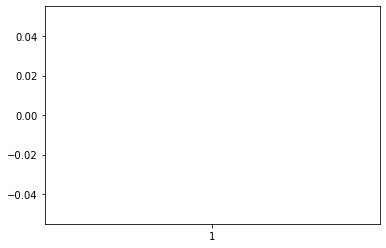

In [29]:
plt.boxplot(data.bore)


(array([ 1.,  1.,  8., 37., 40., 28., 27., 42., 17.,  4.]),
 array([2.54, 2.68, 2.82, 2.96, 3.1 , 3.24, 3.38, 3.52, 3.66, 3.8 , 3.94]),
 <BarContainer object of 10 artists>)

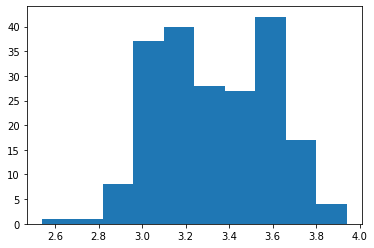

In [55]:
plt.hist(data.bore)

In [30]:
#here no outlier so replace with mean
data.bore.fillna(data.bore.mean(),inplace=True)


In [31]:
data.bore.isnull().sum()

0

In [32]:
data.stroke.isnull().sum()

4

(array([ 3.,  1., 13.,  7., 30., 52., 71., 15.,  7.,  2.]),
 array([2.07, 2.28, 2.49, 2.7 , 2.91, 3.12, 3.33, 3.54, 3.75, 3.96, 4.17]),
 <BarContainer object of 10 artists>)

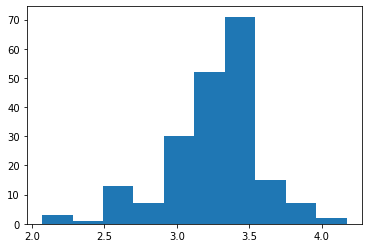

In [34]:
plt.hist(data.stroke)

In [35]:
data.stroke.fillna(data.stroke.mean(),inplace=True)

In [36]:
data.stroke.isnull().sum()

0

In [37]:
data.horsepower.isnull().sum()

2

{'whiskers': [<matplotlib.lines.Line2D at 0x22054c1b040>,
 'caps': [<matplotlib.lines.Line2D at 0x22054c1b760>,
 'boxes': [<matplotlib.lines.Line2D at 0x22054c0ac40>],
 'medians': [<matplotlib.lines.Line2D at 0x22054c1be80>],
 'fliers': [<matplotlib.lines.Line2D at 0x22054c25250>],
 'means': []}

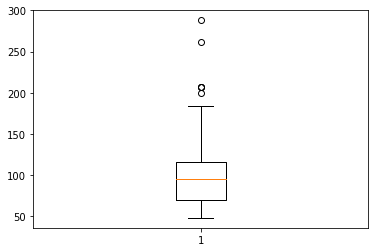

In [41]:
plt.boxplot(data.horsepower)

In [42]:
data.horsepower.fillna(data.horsepower.median(),inplace=True)

In [43]:
data.horsepower.isnull().sum()

0

In [44]:
data.peak_rpm.isnull().sum()            


2

(array([17., 10., 41., 31., 31., 51.,  8., 12.,  0.,  2.]),
 array([4150., 4395., 4640., 4885., 5130., 5375., 5620., 5865., 6110.,
        6355., 6600.]),
 <BarContainer object of 10 artists>)

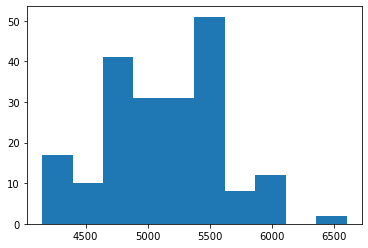

In [46]:
plt.hist(data.peak_rpm)

In [48]:
data.peak_rpm.fillna(data.peak_rpm.mean(),inplace=True)

In [49]:
data.peak_rpm.isnull().sum()            


0

In [50]:
data.price.isnull().sum()               

4

(array([81., 45., 35., 17.,  6.,  3.,  4.,  7.,  2.,  1.]),
 array([ 5118. ,  9146.2, 13174.4, 17202.6, 21230.8, 25259. , 29287.2,
        33315.4, 37343.6, 41371.8, 45400. ]),
 <BarContainer object of 10 artists>)

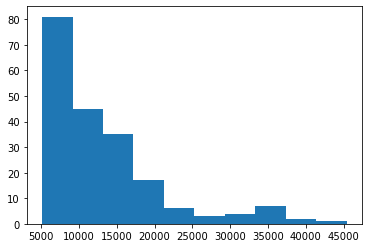

In [52]:
plt.hist(data.price)

In [53]:
data.price.fillna(data.price.mean(),inplace=True)

In [54]:
data.price.isnull().sum()               

0

<h1>CONTINEOUS DATA
    <h4>
  
  2."normalized_losses"
  3."wheel-base"
  4. "length"
  5. "width"
  6."height"
  7."curb-weight"
  8."engine-size"
  9."bore"
  10."stroke"
  11."compression-ratio"
  12."horsepower"
  13."peak_rpm"
  14."city-mpg"
  15."highway-mpg"
  16."price"





In [58]:
data.normalized_losses.describe()


count    205.000000
mean     120.600000
std       31.805105
min       65.000000
25%      101.000000
50%      115.000000
75%      137.000000
max      256.000000
Name: normalized_losses, dtype: float64

In [59]:
data.normalized_losses.unique()

array([115., 164., 158., 192., 188., 121.,  98.,  81., 118., 148., 110.,
       145., 137., 101.,  78., 106.,  85., 107., 104., 113., 150., 129.,
        93., 142., 161., 153., 125., 128., 122., 103., 168., 108., 194.,
       231., 119., 154.,  74., 186.,  83., 102.,  89.,  87.,  77.,  91.,
       134.,  65., 197.,  90.,  94., 256.,  95.])

{'whiskers': [<matplotlib.lines.Line2D at 0x220560799d0>,
 'caps': [<matplotlib.lines.Line2D at 0x22056086160>,
 'boxes': [<matplotlib.lines.Line2D at 0x220560796a0>],
 'medians': [<matplotlib.lines.Line2D at 0x22056086880>],
 'fliers': [<matplotlib.lines.Line2D at 0x22056086c10>],
 'means': []}

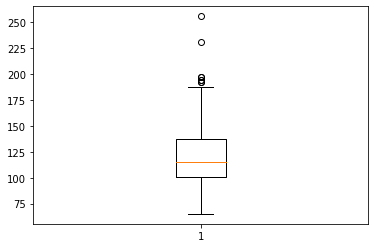

In [61]:
plt.boxplot(data.normalized_losses)

(array([17., 46., 72., 20., 21., 18.,  9.,  0.,  1.,  1.]),
 array([ 65. ,  84.1, 103.2, 122.3, 141.4, 160.5, 179.6, 198.7, 217.8,
        236.9, 256. ]),
 <BarContainer object of 10 artists>)

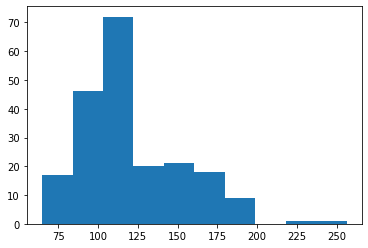

In [62]:
plt.hist(data.normalized_losses)

In [ ]:
plt.boxplot(data.normalized_losses)


In [63]:
stats.shapiro(data.normalized_losses)

ShapiroResult(statistic=0.9371652007102966, pvalue=9.691518698673462e-08)

In [66]:
data.wheel_base.describe()

count    205.000000
mean      98.756585
std        6.021776
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheel_base, dtype: float64

In [67]:
data.wheel_base.unique()

array([ 88.6,  94.5,  99.8,  99.4, 105.8,  99.5, 101.2, 103.5, 110. ,
        88.4,  93.7, 103.3,  95.9,  86.6,  96.5,  94.3,  96. , 113. ,
       102. ,  93.1,  95.3,  98.8, 104.9, 106.7, 115.6,  96.6, 120.9,
       112. , 102.7,  93. ,  96.3,  95.1,  97.2, 100.4,  91.3,  99.2,
       107.9, 114.2, 108. ,  89.5,  98.4,  96.1,  99.1,  93.3,  97. ,
        96.9,  95.7, 102.4, 102.9, 104.5,  97.3, 104.3, 109.1])

{'whiskers': [<matplotlib.lines.Line2D at 0x22056167f70>,
 'caps': [<matplotlib.lines.Line2D at 0x220561766d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22056167be0>],
 'medians': [<matplotlib.lines.Line2D at 0x22056176df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x220561811c0>],
 'means': []}

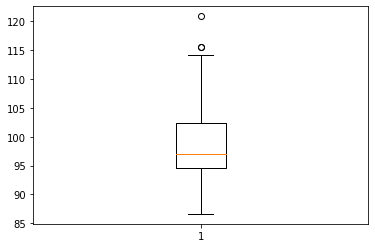

In [68]:
plt.boxplot(data.wheel_base)

(array([ 8.,  9., 83., 42., 24., 14., 15.,  3.,  6.,  1.]),
 array([ 86.6 ,  90.03,  93.46,  96.89, 100.32, 103.75, 107.18, 110.61,
        114.04, 117.47, 120.9 ]),
 <BarContainer object of 10 artists>)

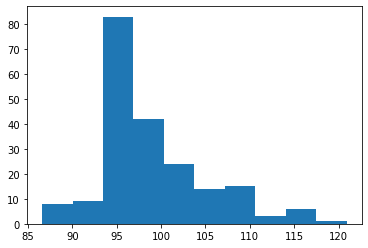

In [70]:
plt.hist(data.wheel_base)

In [71]:
stats.shapiro(data.length)

ShapiroResult(statistic=0.9820953607559204, pvalue=0.01036272943019867)

In [72]:
data.length.describe()

count    205.000000
mean     174.049268
std       12.337289
min      141.100000
25%      166.300000
50%      173.200000
75%      183.100000
max      208.100000
Name: length, dtype: float64

In [73]:
data.length.unique()

array([168.8, 171.2, 176.6, 177.3, 192.7, 178.2, 176.8, 189. , 193.8,
       197. , 141.1, 155.9, 158.8, 157.3, 174.6, 173.2, 144.6, 150. ,
       163.4, 157.1, 167.5, 175.4, 169.1, 170.7, 172.6, 199.6, 191.7,
       159.1, 166.8, 169. , 177.8, 175. , 190.9, 187.5, 202.6, 180.3,
       208.1, 199.2, 178.4, 173. , 172.4, 165.3, 170.2, 165.6, 162.4,
       173.4, 181.7, 184.6, 178.5, 186.7, 198.9, 167.3, 168.9, 175.7,
       181.5, 186.6, 156.9, 157.9, 172. , 173.5, 173.6, 158.7, 169.7,
       166.3, 168.7, 176.2, 175.6, 183.5, 187.8, 171.7, 159.3, 165.7,
       180.2, 183.1, 188.8])

{'whiskers': [<matplotlib.lines.Line2D at 0x220562caa00>,
 'caps': [<matplotlib.lines.Line2D at 0x220562db160>,
 'boxes': [<matplotlib.lines.Line2D at 0x220562ca670>],
 'medians': [<matplotlib.lines.Line2D at 0x220562db880>],
 'fliers': [<matplotlib.lines.Line2D at 0x220562dbc10>],
 'means': []}

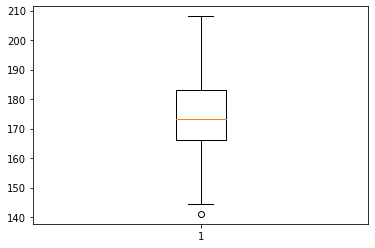

In [74]:
plt.boxplot(data.length)

(array([ 3.,  3., 29., 23., 54., 39., 23., 20.,  8.,  3.]),
 array([141.1, 147.8, 154.5, 161.2, 167.9, 174.6, 181.3, 188. , 194.7,
        201.4, 208.1]),
 <BarContainer object of 10 artists>)

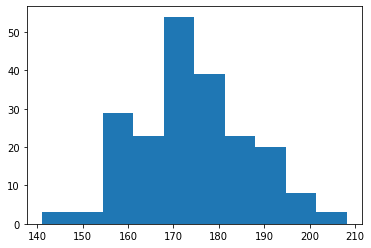

In [75]:
plt.hist(data.length)

In [76]:
stats.shapiro(data.length)

ShapiroResult(statistic=0.9820953607559204, pvalue=0.01036272943019867)

In [ ]:
data.width.describe()

In [ ]:
data.width.unique()

{'whiskers': [<matplotlib.lines.Line2D at 0x220563b1d00>,
 'caps': [<matplotlib.lines.Line2D at 0x220563c1490>,
 'boxes': [<matplotlib.lines.Line2D at 0x220563b1970>],
 'medians': [<matplotlib.lines.Line2D at 0x220563c1bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x220563c1f40>],
 'means': []}

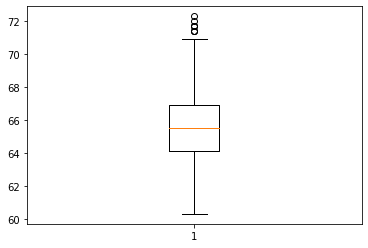

In [77]:
plt.boxplot(data.width)

(array([ 1.,  2., 36., 39., 44., 42., 20.,  7.,  6.,  8.]),
 array([60.3, 61.5, 62.7, 63.9, 65.1, 66.3, 67.5, 68.7, 69.9, 71.1, 72.3]),
 <BarContainer object of 10 artists>)

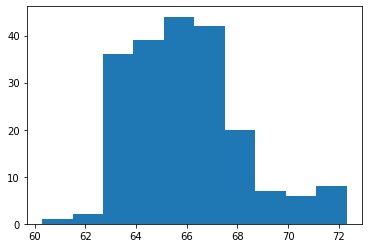

In [78]:
plt.hist(data.width)

In [79]:
stats.shapiro(data.width)

ShapiroResult(statistic=0.9210780262947083, pvalue=5.012857240416224e-09)

In [87]:
  data.curb_weight.describe()




count     205.000000
mean     2555.565854
std       520.680204
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2935.000000
max      4066.000000
Name: curb_weight, dtype: float64

In [88]:
  data.curb_weight.unique()

array([2548, 2823, 2337, 2824, 2507, 2844, 2954, 3086, 3053, 2395, 2710,
       2765, 3055, 3230, 3380, 3505, 1488, 1874, 1909, 1876, 2128, 1967,
       1989, 2191, 2535, 2811, 1713, 1819, 1837, 1940, 1956, 2010, 2024,
       2236, 2289, 2304, 2372, 2465, 2293, 2734, 4066, 3950, 1890, 1900,
       1905, 1945, 1950, 2380, 2385, 2500, 2410, 2443, 2425, 2670, 2700,
       3515, 3750, 3495, 3770, 3740, 3685, 3900, 3715, 2910, 1918, 1944,
       2004, 2145, 2370, 2328, 2833, 2921, 2926, 2365, 2405, 2403, 1889,
       2017, 1938, 1951, 2028, 1971, 2037, 2008, 2324, 2302, 3095, 3296,
       3060, 3071, 3139, 3020, 3197, 3430, 3075, 3252, 3285, 3485, 3130,
       2818, 2778, 2756, 2800, 3366, 2579, 2460, 2658, 2695, 2707, 2758,
       2808, 2847, 2050, 2120, 2240, 2190, 2340, 2510, 2290, 2455, 2420,
       2650, 1985, 2040, 2015, 2280, 3110, 2081, 2109, 2275, 2094, 2122,
       2140, 2169, 2204, 2265, 2300, 2540, 2536, 2551, 2679, 2714, 2975,
       2326, 2480, 2414, 2458, 2976, 3016, 3131, 31

{'whiskers': [<matplotlib.lines.Line2D at 0x22058ffa760>,
 'caps': [<matplotlib.lines.Line2D at 0x22058ffae80>,
 'boxes': [<matplotlib.lines.Line2D at 0x22058ffa3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x22058cd65e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22058cd6970>],
 'means': []}

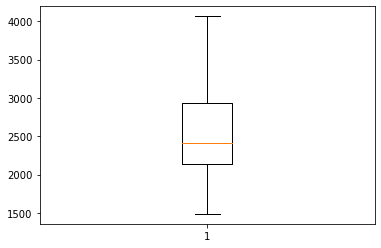

In [89]:
plt.boxplot(data.curb_weight)

(array([ 2., 29., 33., 50., 25., 23., 26.,  8.,  5.,  4.]),
 array([1488. , 1745.8, 2003.6, 2261.4, 2519.2, 2777. , 3034.8, 3292.6,
        3550.4, 3808.2, 4066. ]),
 <BarContainer object of 10 artists>)

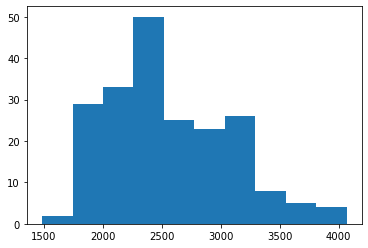

In [90]:
plt.hist(data.curb_weight)

In [91]:
stats.shapiro(data.curb_weight)

ShapiroResult(statistic=0.9530424475669861, pvalue=2.8916113024024526e-06)

In [93]:
data.engine_size.describe()


count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: engine_size, dtype: float64

In [94]:
data.engine_size.unique()

array([130, 152, 109, 136, 131, 108, 164, 209,  61,  90,  98, 122, 156,
        92,  79, 110, 111, 119, 258, 326,  91,  70,  80, 140, 134, 183,
       234, 308, 304,  97, 103, 120, 181, 151, 194, 203, 132, 121, 146,
       171, 161, 141, 173, 145], dtype=int64)

(array([ 6., 95., 46., 30., 14.,  7.,  2.,  2.,  0.,  3.]),
 array([ 61. ,  87.5, 114. , 140.5, 167. , 193.5, 220. , 246.5, 273. ,
        299.5, 326. ]),
 <BarContainer object of 10 artists>)

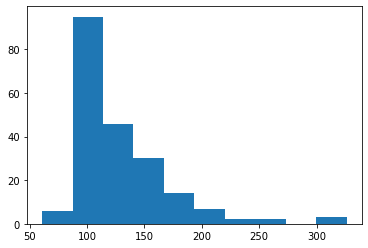

In [95]:
plt.hist(data.engine_size)

{'whiskers': [<matplotlib.lines.Line2D at 0x22058e7a7c0>,
 'caps': [<matplotlib.lines.Line2D at 0x22058e7ae80>,
 'boxes': [<matplotlib.lines.Line2D at 0x22058e7a460>],
 'medians': [<matplotlib.lines.Line2D at 0x22058e885e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22058e88970>],
 'means': []}

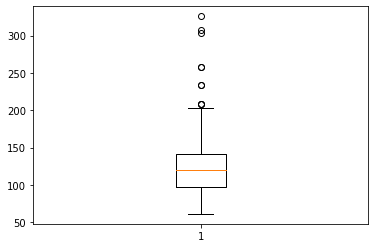

In [97]:
plt.boxplot(data.engine_size)

In [98]:
stats.shapiro(data.engine_size)

ShapiroResult(statistic=0.8294388651847839, pvalue=3.0569154792128156e-14)

In [99]:
  data.bore.describe()
  

count    201.000000
mean       3.329751
std        0.273539
min        2.540000
25%        3.150000
50%        3.310000
75%        3.590000
max        3.940000
Name: bore, dtype: float64

In [100]:
data.bore.unique()

array([3.47, 2.68, 3.19, 3.13, 3.5 , 3.31, 3.62, 2.91, 3.03, 2.97, 3.34,
       3.6 , 2.92, 3.15, 3.43, 3.63, 3.54, 3.08,  nan, 3.39, 3.76, 3.58,
       3.46, 3.8 , 3.78, 3.17, 3.35, 3.59, 2.99, 3.33, 3.7 , 3.61, 3.94,
       3.74, 2.54, 3.05, 3.27, 3.24, 3.01])

In [255]:
data.bore.fillna(data.bore.mean(),inplace=True)

In [256]:
data.bore.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x2205a4db3a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2205a4dbac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2205a4ccfa0>],
 'medians': [<matplotlib.lines.Line2D at 0x2205a4e7220>],
 'fliers': [<matplotlib.lines.Line2D at 0x2205a4e75b0>],
 'means': []}

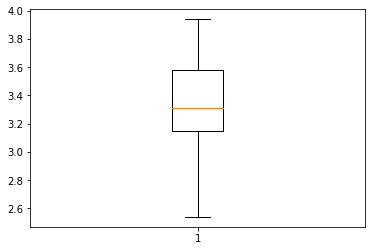

In [122]:
plt.boxplot(data.bore)

(array([ 1.,  1.,  8., 37., 40., 28., 27., 42., 17.,  4.]),
 array([2.54, 2.68, 2.82, 2.96, 3.1 , 3.24, 3.38, 3.52, 3.66, 3.8 , 3.94]),
 <BarContainer object of 10 artists>)

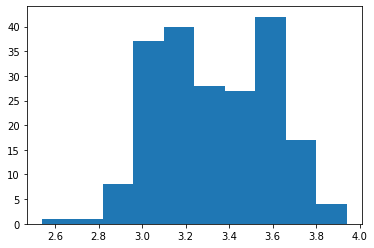

In [121]:
plt.hist(data.bore)

In [120]:
stats.shapiro(data.bore)

ShapiroResult(statistic=0.967185378074646, pvalue=0.00010421191109344363)

In [118]:
data.stroke.describe()
  

count    205.000000
mean       3.255423
std        0.313597
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64

In [119]:
data.stroke.unique()

array([2.68      , 3.47      , 3.4       , 2.8       , 3.19      ,
       3.39      , 3.03      , 3.11      , 3.23      , 3.46      ,
       3.9       , 3.41      , 3.07      , 3.58      , 4.17      ,
       2.76      , 3.15      , 3.25542289, 3.16      , 3.64      ,
       3.1       , 3.35      , 3.12      , 3.86      , 3.29      ,
       3.27      , 3.52      , 2.19      , 3.21      , 2.9       ,
       2.07      , 2.36      , 2.64      , 3.08      , 3.5       ,
       3.54      , 2.87      ])

In [260]:

data.stroke.fillna(data.stroke.mean(),inplace=True)

In [261]:
data.stroke.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x2205a542880>,
 'caps': [<matplotlib.lines.Line2D at 0x2205a542fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2205a5424f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2205a54f730>],
 'fliers': [<matplotlib.lines.Line2D at 0x2205a54fac0>],
 'means': []}

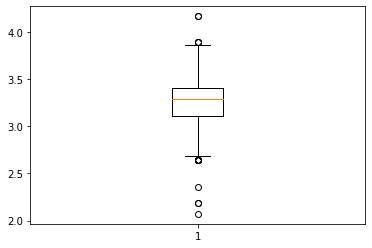

In [124]:
plt.boxplot(data.stroke)

(array([ 3.,  1., 13.,  7., 30., 56., 71., 15.,  7.,  2.]),
 array([2.07, 2.28, 2.49, 2.7 , 2.91, 3.12, 3.33, 3.54, 3.75, 3.96, 4.17]),
 <BarContainer object of 10 artists>)

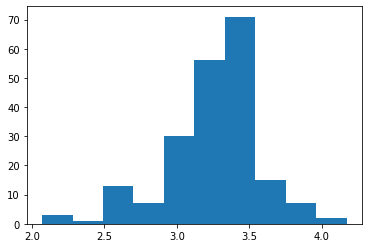

In [125]:
plt.hist(data.stroke)

In [126]:
stats.shapiro(data.stroke)

ShapiroResult(statistic=0.9377973675727844, pvalue=1.0984009435333064e-07)

In [110]:
data.compression_ratio.describe()
  

count    205.000000
mean      10.142537
std        3.972040
min        7.000000
25%        8.600000
50%        9.000000
75%        9.400000
max       23.000000
Name: compression_ratio, dtype: float64

In [111]:
data.compression_ratio.unique()

array([ 9.  , 10.  ,  8.  ,  8.5 ,  8.3 ,  7.  ,  8.8 ,  9.5 ,  9.6 ,
        9.41,  9.4 ,  7.6 ,  9.2 , 10.1 ,  9.1 ,  8.1 , 11.5 ,  8.6 ,
       22.7 , 22.  , 21.5 ,  7.5 , 21.9 ,  7.8 ,  8.4 , 21.  ,  8.7 ,
        9.31,  9.3 ,  7.7 , 22.5 , 23.  ])

{'whiskers': [<matplotlib.lines.Line2D at 0x2205a303850>,
 'caps': [<matplotlib.lines.Line2D at 0x2205a303f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x2205a3034c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2205a3106d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2205a310a60>],
 'means': []}

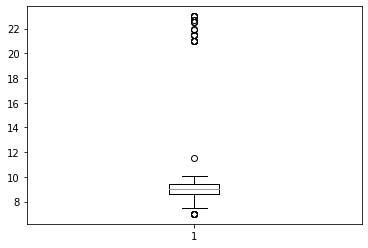

In [112]:
plt.boxplot(data.compression_ratio)

(array([ 51., 133.,   1.,   0.,   0.,   0.,   0.,   0.,   5.,  15.]),
 array([ 7. ,  8.6, 10.2, 11.8, 13.4, 15. , 16.6, 18.2, 19.8, 21.4, 23. ]),
 <BarContainer object of 10 artists>)

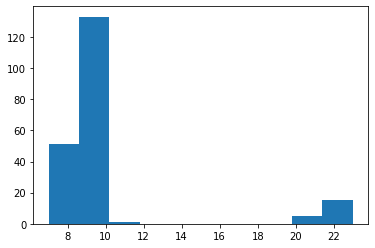

In [114]:
plt.hist(data.compression_ratio)

In [127]:
stats.shapiro(data.compression_ratio)

ShapiroResult(statistic=0.49774158000946045, pvalue=8.12114079238121e-24)

In [128]:
data.horsepower.describe()

count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

In [129]:
data.horsepower.unique()


array([111., 154., 102., 115., 110., 140., 160., 101., 121., 182.,  48.,
        70.,  68.,  88., 145.,  58.,  76.,  60.,  86., 100.,  78.,  90.,
       176., 262., 135.,  84.,  64., 120.,  72., 123., 155., 184., 175.,
       116.,  69.,  55.,  97., 152., 200.,  95., 142., 143., 207., 288.,
        nan,  73.,  82.,  94.,  62.,  56., 112.,  92., 161., 156.,  52.,
        85., 114., 162., 134., 106.])

(array([55., 49., 49., 13., 23.,  8.,  4.,  0.,  1.,  1.]),
 array([ 48.,  72.,  96., 120., 144., 168., 192., 216., 240., 264., 288.]),
 <BarContainer object of 10 artists>)

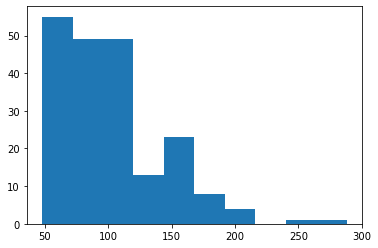

In [130]:
plt.hist(data.horsepower)

{'whiskers': [<matplotlib.lines.Line2D at 0x2205a69a040>,
 'caps': [<matplotlib.lines.Line2D at 0x2205a69a760>,
 'boxes': [<matplotlib.lines.Line2D at 0x2205a68bc70>],
 'medians': [<matplotlib.lines.Line2D at 0x2205a69aeb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2205a6a7280>],
 'means': []}

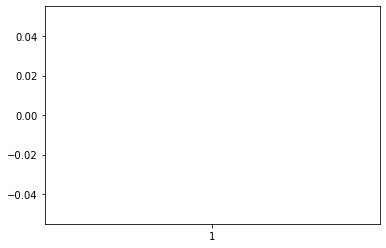

In [131]:
plt.boxplot(data.horsepower)

In [267]:

data.horsepower.fillna(data.horsepower.mean(),inplace=True)

In [268]:
data.horsepower.isnull().sum()

0

In [137]:
stats.shapiro(data.horsepower)

ShapiroResult(statistic=0.8850876688957214, pvalue=2.11449850684442e-11)

In [138]:
data.peak_rpm.describe()

count     203.000000
mean     5125.369458
std       479.334560
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peak_rpm, dtype: float64

In [139]:
data.peak_rpm.unique()

array([5000., 5500., 5800., 4250., 5400., 5100., 4800., 6000., 4750.,
       4650., 4200., 4350., 4500., 5200., 4150., 5600., 5900., 5750.,
         nan, 5250., 4900., 4400., 6600., 5300.])

{'whiskers': [<matplotlib.lines.Line2D at 0x2205a7004f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2205a700c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2205a700160>],
 'medians': [<matplotlib.lines.Line2D at 0x2205a70a370>],
 'fliers': [<matplotlib.lines.Line2D at 0x2205a70a730>],
 'means': []}

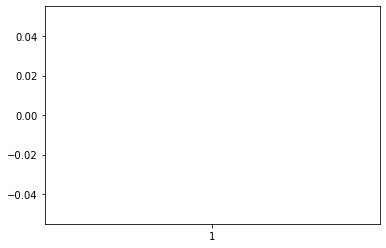

In [140]:

  plt.boxplot(data.peak_rpm)

(array([17., 10., 41., 31., 31., 51.,  8., 12.,  0.,  2.]),
 array([4150., 4395., 4640., 4885., 5130., 5375., 5620., 5865., 6110.,
        6355., 6600.]),
 <BarContainer object of 10 artists>)

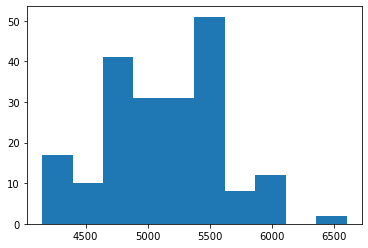

In [141]:
plt.hist(data.peak_rpm)

In [273]:

data.peak_rpm.fillna(data.peak_rpm.mean(),inplace=True)

In [274]:
data.peak_rpm.isnull().sum()

0

In [146]:
stats.shapiro(data.peak_rpm)

ShapiroResult(statistic=0.9705138802528381, pvalue=0.000267903262283653)

In [147]:
data.city_mpg.describe()


count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: city_mpg, dtype: float64

In [148]:
data.city_mpg.unique()

array([21, 19, 24, 18, 17, 16, 23, 20, 15, 47, 38, 37, 31, 49, 30, 27, 25,
       13, 26, 36, 22, 14, 45, 28, 32, 35, 34, 29, 33], dtype=int64)

{'whiskers': [<matplotlib.lines.Line2D at 0x2205a7d8670>,
 'caps': [<matplotlib.lines.Line2D at 0x2205a7d8d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2205a7d82e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2205a7e34f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2205a7e3880>],
 'means': []}

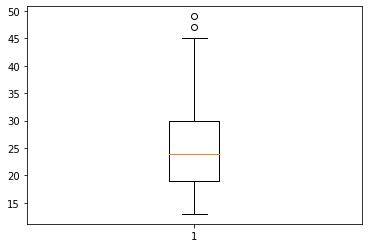

In [149]:
plt.boxplot(data.city_mpg)

(array([12., 46., 24., 56., 18., 31., 15.,  0.,  1.,  2.]),
 array([13. , 16.6, 20.2, 23.8, 27.4, 31. , 34.6, 38.2, 41.8, 45.4, 49. ]),
 <BarContainer object of 10 artists>)

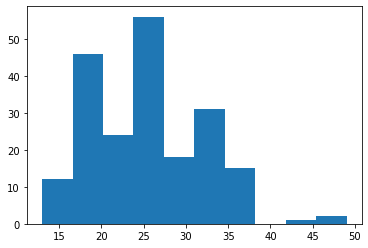

In [150]:
plt.hist(data.city_mpg)

In [151]:
stats.shapiro(data.city_mpg)

ShapiroResult(statistic=0.9572238922119141, pvalue=7.825866305211093e-06)

In [153]:
data.highway_mpg.describe()


count    205.000000
mean      30.751220
std        6.886443
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: highway_mpg, dtype: float64

In [154]:
data.highway_mpg.unique()

array([27, 26, 30, 22, 25, 20, 29, 28, 53, 43, 41, 38, 24, 54, 42, 34, 33,
       31, 19, 17, 23, 32, 39, 18, 16, 37, 50, 36, 47, 46], dtype=int64)

{'whiskers': [<matplotlib.lines.Line2D at 0x2205a93b7c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2205a93bee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2205a93b430>],
 'medians': [<matplotlib.lines.Line2D at 0x2205a948640>],
 'fliers': [<matplotlib.lines.Line2D at 0x2205a9489d0>],
 'means': []}

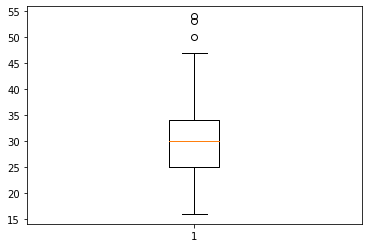

In [156]:
plt.boxplot(data.highway_mpg)

(array([ 7., 17., 44., 47., 39., 32.,  8.,  6.,  3.,  2.]),
 array([16. , 19.8, 23.6, 27.4, 31.2, 35. , 38.8, 42.6, 46.4, 50.2, 54. ]),
 <BarContainer object of 10 artists>)

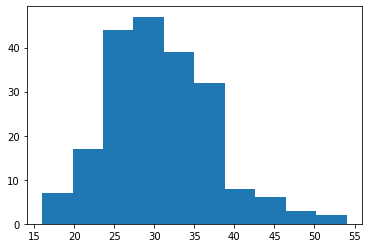

In [157]:
plt.hist(data.highway_mpg)

In [158]:
stats.shapiro(data.highway_mpg)

ShapiroResult(statistic=0.9735103845596313, pvalue=0.0006515368004329503)

In [159]:

  data.price.describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

In [160]:

  data.price.unique()

array([13495., 16500., 13950., 17450., 15250., 17710., 18920., 23875.,
          nan, 16430., 16925., 20970., 21105., 24565., 30760., 41315.,
       36880.,  5151.,  6295.,  6575.,  5572.,  6377.,  7957.,  6229.,
        6692.,  7609.,  8558.,  8921., 12964.,  6479.,  6855.,  5399.,
        6529.,  7129.,  7295.,  7895.,  9095.,  8845., 10295., 12945.,
       10345.,  6785., 11048., 32250., 35550., 36000.,  5195.,  6095.,
        6795.,  6695.,  7395., 10945., 11845., 13645., 15645.,  8495.,
       10595., 10245., 10795., 11245., 18280., 18344., 25552., 28248.,
       28176., 31600., 34184., 35056., 40960., 45400., 16503.,  5389.,
        6189.,  6669.,  7689.,  9959.,  8499., 12629., 14869., 14489.,
        6989.,  8189.,  9279.,  5499.,  7099.,  6649.,  6849.,  7349.,
        7299.,  7799.,  7499.,  7999.,  8249.,  8949.,  9549., 13499.,
       14399., 17199., 19699., 18399., 11900., 13200., 12440., 13860.,
       15580., 16900., 16695., 17075., 16630., 17950., 18150., 12764.,
      

{'whiskers': [<matplotlib.lines.Line2D at 0x2205aa1b4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2205aa1bc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2205aa1b160>],
 'medians': [<matplotlib.lines.Line2D at 0x2205aa26370>],
 'fliers': [<matplotlib.lines.Line2D at 0x2205aa26700>],
 'means': []}

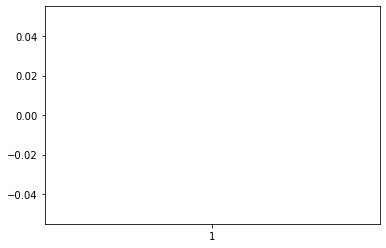

In [161]:
plt.boxplot(data.price)

(array([81., 45., 35., 17.,  6.,  3.,  4.,  7.,  2.,  1.]),
 array([ 5118. ,  9146.2, 13174.4, 17202.6, 21230.8, 25259. , 29287.2,
        33315.4, 37343.6, 41371.8, 45400. ]),
 <BarContainer object of 10 artists>)

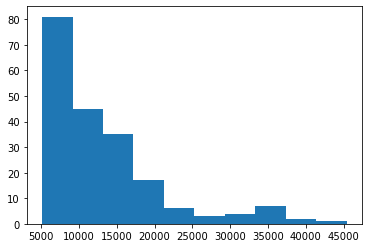

In [162]:
plt.hist(data.price)

In [243]:

data.price.fillna(data.price.mean(),inplace=True)

In [244]:
stats.shapiro(data.price)

ShapiroResult(statistic=0.7997004985809326, pvalue=1.691838515494677e-15)

array([[<AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'normalized_losses'}>,
        <AxesSubplot:title={'center':'wheel_base'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'curb_weight'}>,
        <AxesSubplot:title={'center':'engine_size'}>],
       [<AxesSubplot:title={'center':'bore'}>,
        <AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compression_ratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'peak_rpm'}>,
        <AxesSubplot:title={'center':'city_mpg'}>,
        <AxesSubplot:title={'center':'highway_mpg'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

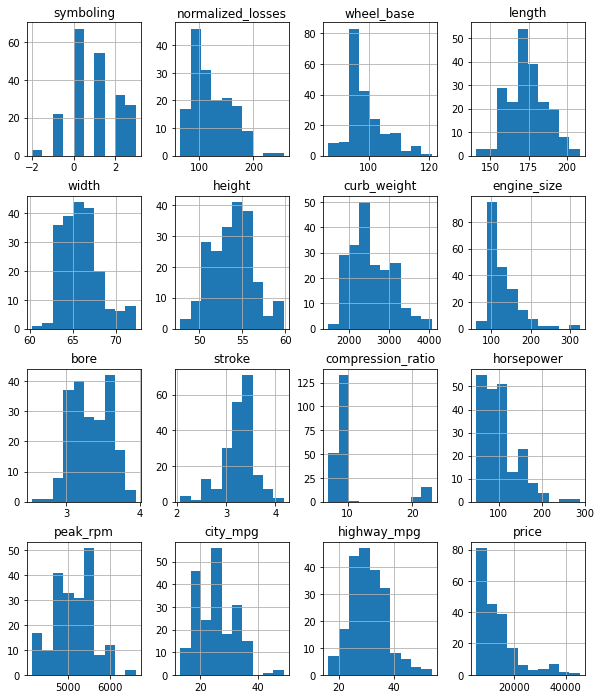

In [166]:
data.hist(figsize=(10,12))

<h1>DISCRETE DATA
    <h3>
    1.SYMBOLING
    2.MAKE
    3.FUEL_TYPE
    4.ASPIRATION
    5.NUM_OF_DOOR
    6.BODY_STYLE
    7.DRIVE_WHEELS
    8.ENGINE_LOCATION
    9.ENGINE_TYPE
    10.NUM_OF_CYLINDERS
    11.FUEL_SYSTEM

In [167]:
data.symboling.describe()

count    205.000000
mean       0.834146
std        1.245307
min       -2.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: symboling, dtype: float64

In [170]:
data.symboling.isnull().sum()

0

In [171]:
data.symboling.unique

<bound method Series.unique of 0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: int64>

In [172]:
data.symboling.value_counts

<bound method IndexOpsMixin.value_counts of 0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: int64>

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='symboling', ylabel='count'>

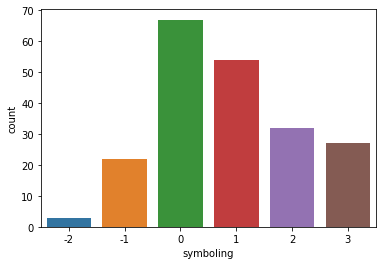

In [173]:
sns.countplot(data.symboling)

In [230]:

data.symboling.replace([-2,-1,0,1,2,3],['less than zero','less than zero','zero','one','two','three'],inplace=True)


AttributeError: 'Series' object has no attribute 'order'

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='symboling', ylabel='count'>

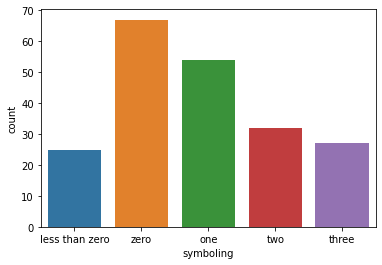

In [234]:
sns.countplot(data.symboling,order=['less than zero','zero','one','two','three'])

In [235]:
data.make.describe()

count        205
unique        22
top       toyota
freq          32
Name: make, dtype: object

In [174]:
data.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [175]:
data.make.value_counts

<bound method IndexOpsMixin.value_counts of 0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: make, Length: 205, dtype: object>

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='make', ylabel='count'>

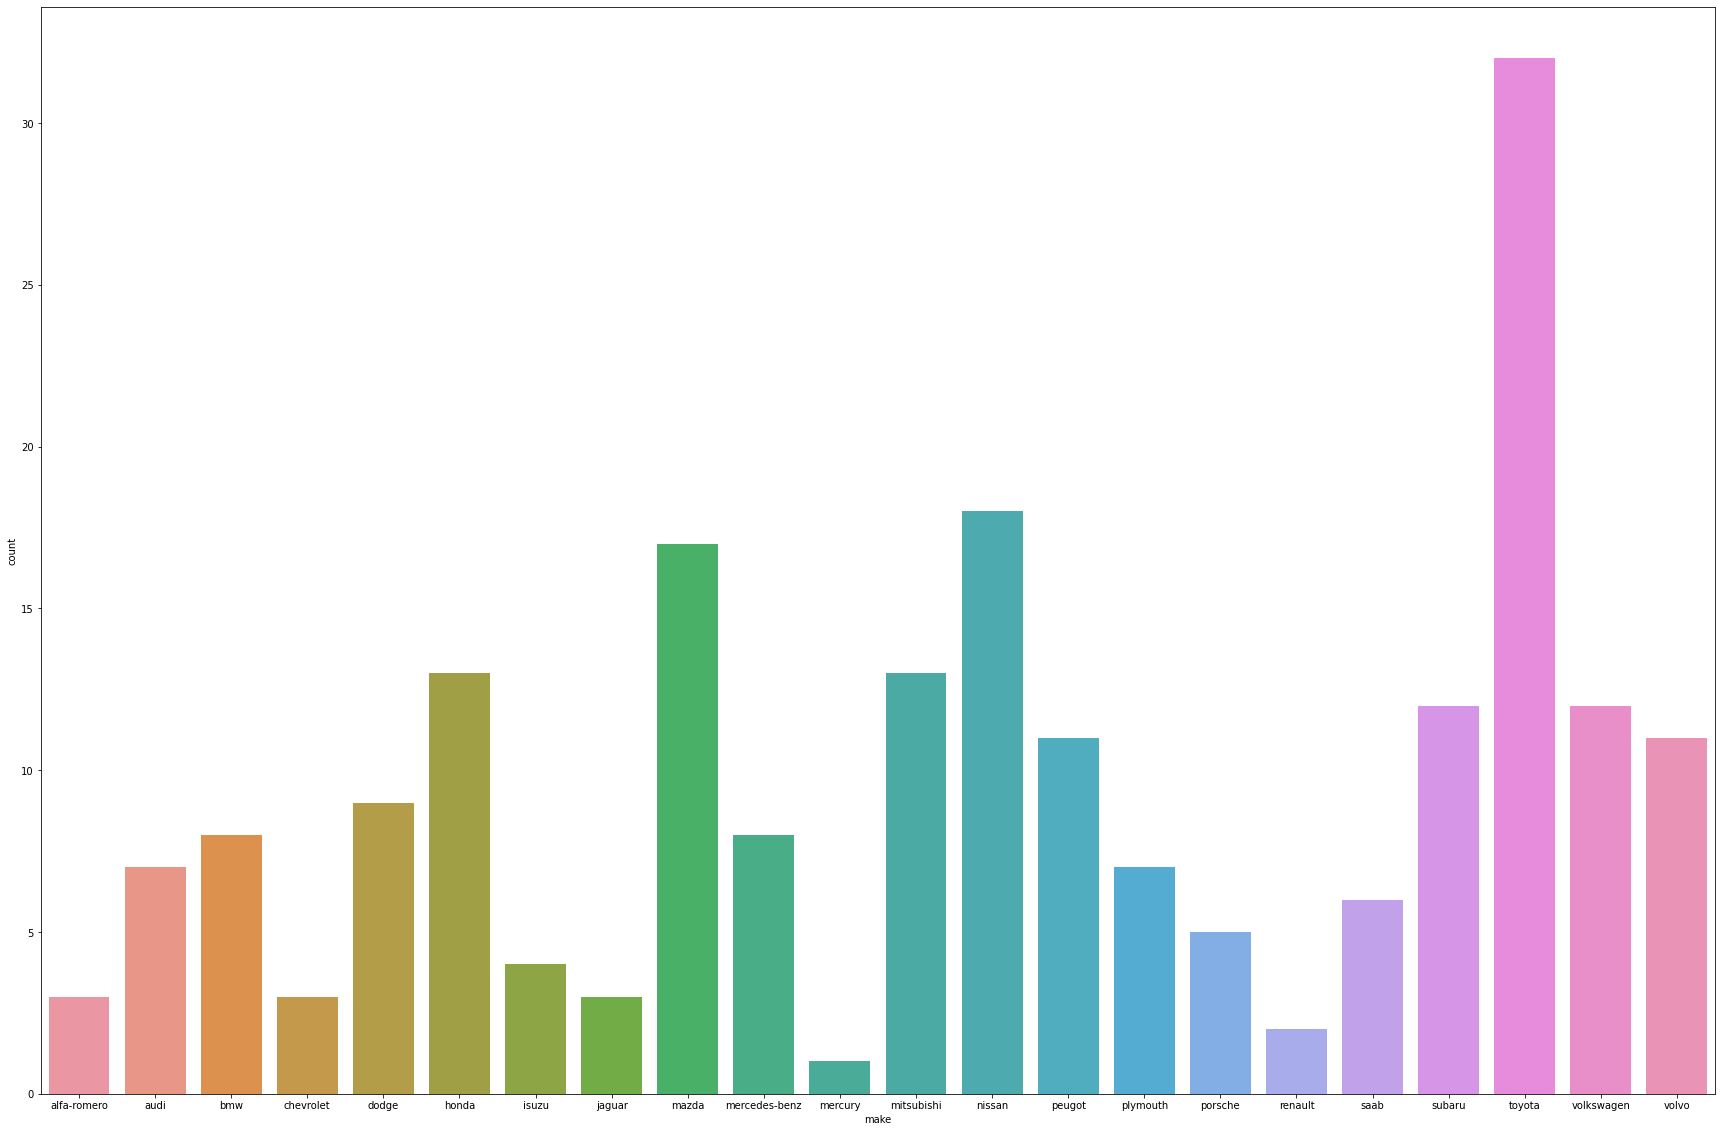

In [183]:
plt.figure(figsize=(30,20))
sns.countplot(data.make)


In [184]:
data.fuel_type.describe()

count     205
unique      2
top       gas
freq      185
Name: fuel_type, dtype: object

In [185]:
data.fuel_type.unique()

array(['gas', 'diesel'], dtype=object)

In [186]:
data.fuel_type.value_counts

<bound method IndexOpsMixin.value_counts of 0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fuel_type, Length: 205, dtype: object>

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuel_type', ylabel='count'>

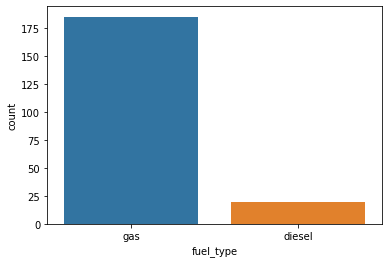

In [187]:
sns.countplot(data.fuel_type)

In [188]:
data.aspiration.describe()

count     205
unique      2
top       std
freq      168
Name: aspiration, dtype: object

In [189]:
data.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [190]:
data.aspiration.value_counts

<bound method IndexOpsMixin.value_counts of 0        std
1        std
2        std
3        std
4        std
       ...  
200      std
201    turbo
202      std
203    turbo
204    turbo
Name: aspiration, Length: 205, dtype: object>

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aspiration', ylabel='count'>

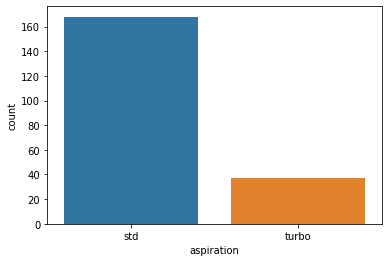

In [191]:
sns.countplot(data.aspiration)

In [192]:
data.num_of_doors.describe()

count      203
unique       2
top       four
freq       114
Name: num_of_doors, dtype: object

In [193]:
data.num_of_doors.unique()

array(['two', 'four', nan], dtype=object)

In [194]:
data.num_of_doors.value_counts

<bound method IndexOpsMixin.value_counts of 0       two
1       two
2       two
3      four
4      four
       ... 
200    four
201    four
202    four
203    four
204    four
Name: num_of_doors, Length: 205, dtype: object>

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_of_doors', ylabel='count'>

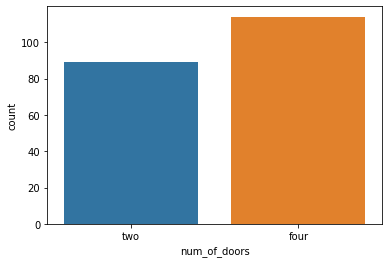

In [195]:
sns.countplot(data.num_of_doors)

In [196]:
data.body_style.describe()

count       205
unique        5
top       sedan
freq         96
Name: body_style, dtype: object

In [197]:
data.body_style.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [198]:
data.body_style.value_counts

<bound method IndexOpsMixin.value_counts of 0      convertible
1      convertible
2        hatchback
3            sedan
4            sedan
          ...     
200          sedan
201          sedan
202          sedan
203          sedan
204          sedan
Name: body_style, Length: 205, dtype: object>

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='body_style', ylabel='count'>

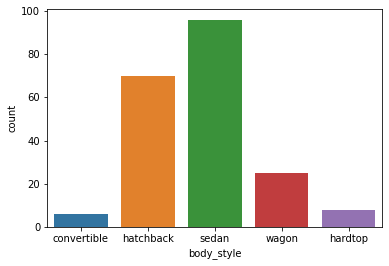

In [199]:
sns.countplot(data.body_style)

In [203]:
data.drive_wheels.describe()       


count     205
unique      3
top       fwd
freq      120
Name: drive_wheels, dtype: object

In [204]:
data.drive_wheels.unique() 

array(['rwd', 'fwd', '4wd'], dtype=object)

In [293]:
data.drive_wheels.isnull().sum() 

0

In [205]:
data.drive_wheels.value_counts

<bound method IndexOpsMixin.value_counts of 0      rwd
1      rwd
2      rwd
3      fwd
4      4wd
      ... 
200    rwd
201    rwd
202    rwd
203    rwd
204    rwd
Name: drive_wheels, Length: 205, dtype: object>

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='drive_wheels', ylabel='count'>

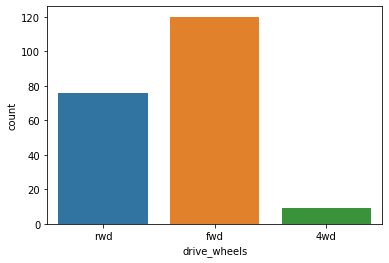

In [206]:
sns.countplot(data.drive_wheels)

In [209]:
 data.engine_location.describe()

count       205
unique        2
top       front
freq        202
Name: engine_location, dtype: object

In [210]:
data.engine_location.unique()

array(['front', 'rear'], dtype=object)

In [212]:
data.engine_location.value_counts()


front    202
rear       3
Name: engine_location, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine_location', ylabel='count'>

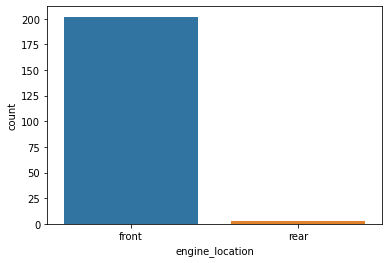

In [214]:
sns.countplot(data.engine_location)

In [215]:
data.engine_type.describe()

count     205
unique      7
top       ohc
freq      148
Name: engine_type, dtype: object

In [216]:
data.engine_type.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [217]:
data.engine_type.value_counts

<bound method IndexOpsMixin.value_counts of 0      dohc
1      dohc
2      ohcv
3       ohc
4       ohc
       ... 
200     ohc
201     ohc
202    ohcv
203     ohc
204     ohc
Name: engine_type, Length: 205, dtype: object>

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine_type', ylabel='count'>

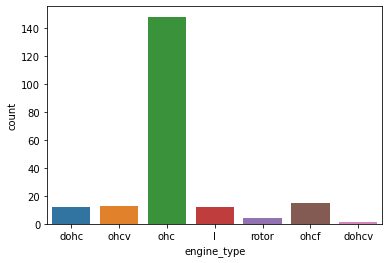

In [218]:
sns.countplot(data.engine_type)

In [220]:
data.engine_type.replace(['dohc','ohcv','l','rotor','ohcf','dohcv'],['non ohc','non ohc','non ohc','non ohc','non ohc','non ohc'],inplace=True)

In [221]:
data.engine_type.value_counts()



ohc        148
non ohc     57
Name: engine_type, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine_type', ylabel='count'>

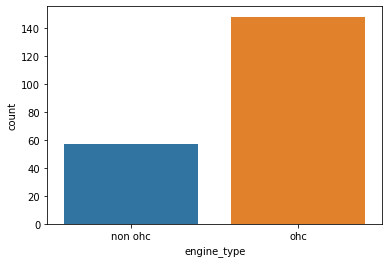

In [223]:
sns.countplot(data.engine_type)


In [298]:
data.num_of_cylinders.describe()

count      205
unique       7
top       four
freq       159
Name: num_of_cylinders, dtype: object

In [299]:
data.num_of_cylinders.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [300]:
data.num_of_cylinders.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num_of_cylinders, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_of_cylinders', ylabel='count'>

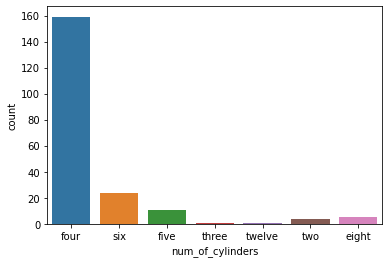

In [301]:
sns.countplot(data.num_of_cylinders)


In [303]:
data.num_of_cylinders.replace(['six','five','three','twelve','two','eight'],['other than four','other than four','other than four','other than four','other than four','other than four'],inplace=True)


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_of_cylinders', ylabel='count'>

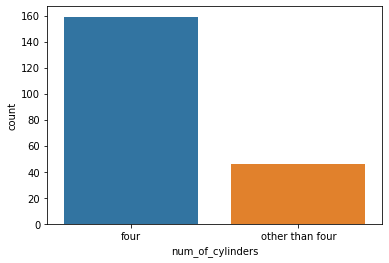

In [304]:
sns.countplot(data.num_of_cylinders)

In [309]:
data.fuel_system.describe()

count      205
unique       8
top       mpfi
freq        94
Name: fuel_system, dtype: object

In [310]:
data.fuel_system.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [311]:
data.fuel_system.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel_system, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuel_system', ylabel='count'>

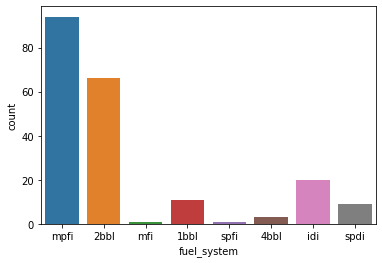

In [312]:
sns.countplot(data.fuel_system)

In [313]:
data.fuel_system.replace(['mfi','1bbl','spfi','4bbl','idi','spdi'],['others','others','others','others','others','others'],inplace=True)


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuel_system', ylabel='count'>

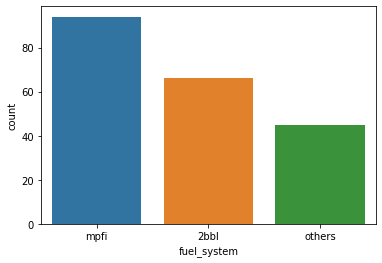

In [314]:
sns.countplot(data.fuel_system)

In [246]:
status=stats.pearsonr(data.normalized_losses,data.price)
print(status)


(0.09433688572120794, 0.17848256271997326)


In [247]:


status=stats.pearsonr(data.wheel_base,data.price)
print(status)


(0.5831681499789547, 4.527625545686765e-20)


In [248]:
status=stats.pearsonr(data.length,data.price)
print(status)

(0.6829862954386219, 1.6498873291218535e-29)


In [249]:
status=stats.pearsonr(data.width,data.price)
print(status)

(0.7286988175931839, 3.214520483804664e-35)


In [250]:
status=stats.pearsonr(data.height,data.price)
print(status)


(0.13438751871051807, 0.05471982048424776)


In [251]:
status=stats.pearsonr(data.curb_weight,data.price)
print(status)



(0.820824733354729, 2.8663321070270534e-51)


In [252]:
status=stats.pearsonr(data.engine_size,data.price)
print(status)


(0.8617522436859721, 9.669661923634776e-62)


In [257]:
status=stats.pearsonr(data.bore,data.price)
print(status)



(0.5323000195387407, 2.1398306512855486e-16)


In [262]:

status=stats.pearsonr(data.stroke,data.price)
print(status)

(0.08209529554134327, 0.24191456857746316)


In [264]:
status=stats.pearsonr(data.compression_ratio,data.price)
print(status)



(0.07099036277901556, 0.31178249194905244)


In [269]:
status=stats.pearsonr(data.horsepower,data.price)
print(status)


(0.7579169537498177, 1.6076703978130332e-39)


In [275]:
status=stats.pearsonr(data.peak_rpm,data.price)
print(status)




(-0.10085406591169085, 0.15019246954232154)


In [276]:
status=stats.pearsonr(data.city_mpg,data.price)
print(status)




(-0.6674492651600004, 8.463700497727807e-28)


In [278]:
status=stats.pearsonr(data.highway_mpg,data.price)
print(status)



(-0.6905257341183488, 2.23246740583743e-30)


In [279]:
part1=data.price[data.symboling=="less than zero"]
part2=data.price[data.symboling=="zero"]
part3=data.price[data.symboling=="one"]
part4=data.price[data.symboling=="two"]
part5=data.price[data.symboling=="three"]
stats.f_oneway(part1,part2,part3,part4,part5)




F_onewayResult(statistic=8.596939059364374, pvalue=2.0165673443215324e-06)

In [280]:
part1=data.price[data.make=="alfa-romero"]
part2=data.price[data.make=="audi"]
part3=data.price[data.make=="bmw"]
part4=data.price[data.make=="chevrolet"]
part5=data.price[data.make=="dodge"]
part6=data.price[data.make=="honda"]
part7=data.price[data.make=="isuzu"]
part8=data.price[data.make=="jaguar"]
part9=data.price[data.make=="mazda"]
part10=data.price[data.make=="mercedes-benz"]
part11=data.price[data.make=="mercury"]
part12=data.price[data.make=="mitsubishi"]
part13=data.price[data.make=="nissan"]
part14=data.price[data.make=="peugot"]
part15=data.price[data.make=="plymouth"]
part16=data.price[data.make=="porsche"]
part17=data.price[data.make=="renault"]
part18=data.price[data.make=="saab"]
part19=data.price[data.make=="subaru"]
part20=data.price[data.make=="toyota"]
part21=data.price[data.make=="volkswagen"]
part22=data.price[data.make=="volvo"]
stats.f_oneway(part1,part2,part3,part4,part5,part6,part7,part8,part9,part10,part11,part12,part13,part14,part15,part16,part17,part18,part19,part20,part21,part22)



F_onewayResult(statistic=29.502215511030318, pvalue=1.019817853242973e-47)

In [281]:

part1=data.price[data.fuel_type=="gas"]
part2=data.price[data.fuel_type=="diesel"]
stats.f_oneway(part1,part2)


F_onewayResult(statistic=2.4958589760681935, pvalue=0.11570297526361666)

In [284]:

part1=data.price[data.aspiration=="std"]
part2=data.price[data.aspiration=="turbo"]
stats.f_oneway(part1,part2)




F_onewayResult(statistic=6.587289855140993, pvalue=0.010991046478632666)

In [286]:
part1=data.price[data.num_of_doors=="two"]
part2=data.price[data.num_of_doors=="four"]
stats.f_oneway(part1,part2)

F_onewayResult(statistic=0.42717100936205654, pvalue=0.5141273489201855)

In [287]:
part1=data.price[data.body_style=="convertible"]
part2=data.price[data.body_style=="hatchback"]
part3=data.price[data.body_style=="sedan"]
part4=data.price[data.body_style=="wagon"]
part5=data.price[data.body_style=="hardtop"]
stats.f_oneway(part1,part2,part3,part4,part5)




F_onewayResult(statistic=9.183927252573389, pvalue=7.844575720929884e-07)

In [308]:


part1=data.price[data.drive_wheels=="not fwd"]
part2=data.price[data.drive_wheels=="fwd"]
stats.f_oneway(part1,part2)

F_onewayResult(statistic=nan, pvalue=nan)

In [294]:
part1=data.price[data.engine_location=="front"]
part2=data.price[data.engine_location=="rear"]
stats.f_oneway(part1,part2)

F_onewayResult(statistic=24.979629190446918, pvalue=1.2486063656822578e-06)

In [295]:
part1=data.price[data.engine_type=="non ohc"]
part2=data.price[data.engine_type=="ohc"]
stats.f_oneway(part1,part2)


F_onewayResult(statistic=24.772969427209247, pvalue=1.3736873269953891e-06)

In [307]:

part1=data.price[data.num_of_cylinders=="four"]
part2=data.price[data.num_of_cylinders=="other than four"]
stats.f_oneway(part1,part2)



F_onewayResult(statistic=173.79146873931847, pvalue=4.465221610591922e-29)

In [315]:

part1=data.price[data.fuel_system=="mpfi"]
part2=data.price[data.fuel_system=="2bbl"]
part3=data.price[data.fuel_system=="others"]
stats.f_oneway(part1,part2,part3)


F_onewayResult(statistic=44.08389496376925, pvalue=1.296937118227724e-16)

In [316]:
y=data.price



In [320]:
x=data.drop(['price','normalized_losses','wheel_base','length','height','bore','stroke','compression_ratio','peak_rpm','city_mpg','highway_mpg','num_of_doors','fuel_type','symboling', 'make', 'aspiration','body_style', 'drive_wheels','engine_location', 'engine_type', 'num_of_cylinders','fuel_system'],axis=1)




In [321]:
x.columns


Index(['width', 'curb_weight', 'engine_size', 'horsepower'], dtype='object')

In [325]:

train_y=y.iloc[0:164]

In [ ]:
test_y=y.iloc[164:]

In [323]:

train_x=x.iloc[0:164]


In [324]:

test_x=x.iloc[164:]

In [326]:



x.shape


(205, 4)

In [327]:

x.shape


(205, 4)

In [328]:
x=train_x
y=test_x

In [329]:


train_x=sm.add_constant(train_x)
test_x=sm.add_constant(test_x)


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [330]:
model=sm.OLS(train_y,train_x).fit()



In [331]:

model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     154.1
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           1.28e-53
Time:                        23:07:40   Log-Likelihood:                -1586.9
No. Observations:                 164   AIC:                             3184.
Df Residuals:                     159   BIC:                             3199.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.277e+04   1.58e+04     -1.445      0.151   -5.39e+04    8357.961
width         183.8594    276.683      0.665      0.507    -362.589     730.307
curb_weight     3.0052      1.476      2.037      0.043       0.091       5.919
engine_size   106.2351     15.368      6.913      0.000      75.883     136.588
horsepower     28.1847     12.967      2.174      0.031       2.575      53.794
==============================================================================
Omnibus:                       18.943   Durbin-Watson:                   1.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.485
Skew:                           0.154   Prob(JB):                     4.06e-17
Kurtosis:                       6.309   Cond. No.                     1.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""